GAYS

In [1]:
import pandas as pd

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df = pd.read_csv('Dades/Accidents_de_tr_nsit_amb_morts_o_ferits_greus_a_Catalunya_20250131.csv')

In [4]:
df[(df['nomCom']=='Vallès Oriental') & (df['zona']=='Carretera')]

,Any,zona,dat,via,pk,nomMun,nomCom,nomDem,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS,F_VICTIMES,F_UNITATS_IMPLICADES,F_VIANANTS_IMPLICADES,F_BICICLETES_IMPLICADES,F_CICLOMOTORS_IMPLICADES,F_MOTOCICLETES_IMPLICADES,F_VEH_LLEUGERS_IMPLICADES,F_VEH_PESANTS_IMPLICADES,F_ALTRES_UNIT_IMPLICADES,F_UNIT_DESC_IMPLICADES,C_VELOCITAT_VIA,D_ACC_AMB_FUGA,D_BOIRA,D_CARACT_ENTORN,D_CARRIL_ESPECIAL,D_CIRCULACIO_MESURES_ESP,D_CLIMATOLOGIA,D_FUNC_ESP_VIA,D_GRAVETAT,D_INFLUIT_BOIRA,D_INFLUIT_CARACT_ENTORN,D_INFLUIT_CIRCULACIO,D_INFLUIT_ESTAT_CLIMA,D_INFLUIT_INTEN_VENT,D_INFLUIT_LLUMINOSITAT,D_INFLUIT_MESU_ESP,D_INFLUIT_OBJ_CALCADA,D_INFLUIT_SOLCS_RASES,D_INFLUIT_VISIBILITAT,D_INTER_SECCIO,D_LIMIT_VELOCITAT,D_LLUMINOSITAT,D_REGULACIO_PRIORITAT,D_SENTITS_VIA,D_SUBTIPUS_ACCIDENT,D_SUBTIPUS_TRAM,D_SUBZONA,D_SUPERFICIE,D_TIPUS_VIA,D_TITULARITAT_VIA,D_TRACAT_ALTIMETRIC,D_VENT,grupDiaLab,hor,grupHor,tipAcc,tipDia
8,2010,Carretera,19/06/2010,AP-7,138,Mollet del Vallès,Vallès Oriental,Barcelona,0,1,2,3,2,0,0,0,0,2,0,0,0,100.0,No,No n'hi ha,Desmunt,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,En secció,Senyal velocitat,"De nit, sense llum artificial",NaN,Doble sentit,Envestida (frontal lateral),NaN,Carretera,Sec i net,Carretera convencional,Estatal,Pla,"Calma, vent molt suau",CapDeSetmana,5.30,Nit,Col.lisió de vehicles en marxa,dis
23,2010,Carretera,28/05/2010,C-17,"39,5",Tagamanent,Vallès Oriental,Barcelona,0,1,0,1,1,0,0,0,0,1,0,0,0,80.0,No,No n'hi ha,A nivell,No n'hi ha,No n'hi ha,Pluja forta,Sense funció especial,Accident greu,No,No,No,Si,No,No,No,No,No,No,En secció,Senyal velocitat,"De dia, dia fosc",NaN,Un sol sentit,Resta sortides de via,NaN,Carretera,Mullat,Carretera convencional,Autonòmica,Rampa o pendent,"Calma, vent molt suau",Feiners,14.50,Tarda,Sortida de la calcada sense especificar,div
34,2010,Carretera,02/07/2010,C-1415B,"8,4",Lliçà d'Amunt,Vallès Oriental,Barcelona,0,1,1,2,2,0,0,0,0,1,1,0,0,100.0,No,No n'hi ha,Mixt,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,En secció,Genérica via,"De dia, dia clar",NaN,Doble sentit,Col·lisió frontal,NaN,Carretera,Sec i net,Carretera convencional,Autonòmica,Rampa o pendent,"Calma, vent molt suau",CapDeSetmana,19.46,Tarda,Col.lisió de vehicles en marxa,div
59,2010,Carretera,27/07/2010,C-59,"14,1",Caldes de Montbui,Vallès Oriental,Barcelona,0,1,0,1,2,0,1,0,0,0,1,0,0,100.0,No,No n'hi ha,A nivell,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,Dintre intersecció,Genérica via,"De dia, dia clar",Sols norma prioritat de pas,Doble sentit,Fregament o col·lisió lateral,Giratòria,Carretera,Sec i net,Carretera convencional,Autonòmica,Pla,"Calma, vent molt suau",Feiners,16.50,Tarda,Col.lisió de vehicles en marxa,dill-dij
163,2010,Carretera,08/07/2010,SE,999999,Canovelles,Vallès Oriental,Barcelona,0,1,0,1,2,0,0,1,0,1,0,0,0,100.0,No,No n'hi ha,A nivell,Carril bici,No n'hi ha,Bon temps,Sense funció especial,Accident greu,No,No,No,No,No,No,No,No,No,No,En secció,Genérica via,"De dia, dia clar",NaN,Doble sentit,Fregament o col·lisió lateral,NaN,Carretera,Sec i net,Altres,Municipal,Pla,"Calma, vent molt suau",Feiners,11.15,Matí,Col.lisió de vehicles en marxa,dill-dij
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24418,2023,Carretera,01/05/2023,BP-5107,44,Sant Pere de Vilamajor,Vallès Oriental,Barcelona,1,0,0,1,1,0,0,0,0,1,0,0,0,100.0,No,No n'hi ha,Sense Especificar,No n'hi ha,No n'hi ha,Bon temps,Sense funció especial,Accident mortal,No,No,No,No,No,No,No,No,No,No,En secció,Genérica via,"De dia, dia clar",NaN,NaN,Resta sortides de via,NaN,Carretera,Sec i net,Carretera convencional,NaN,NaN,"Calma, vent molt suau",Feiners,15.33,Tarda,Sortida de la calcada sense especificar,dill-dij
24440,2023,

In [25]:
df.describe()

,Any,F_MORTS,F_FERITS_GREUS,F_FERITS_LLEUS,F_VICTIMES,F_UNITATS_IMPLICADES,F_VIANANTS_IMPLICADES,F_BICICLETES_IMPLICADES,F_CICLOMOTORS_IMPLICADES,F_MOTOCICLETES_IMPLICADES,F_VEH_LLEUGERS_IMPLICADES,F_VEH_PESANTS_IMPLICADES,F_ALTRES_UNIT_IMPLICADES,F_UNIT_DESC_IMPLICADES,C_VELOCITAT_VIA,hor
count,24478.000000,24478.000000,24478.000000,24478.000000,24478.000000,24478.000000,24478.000000,24478.000000,24478.000000,24478.000000,24478.000000,24478.000000,24478.000000,24478.000000,21416.000000,24478.000000
mean,2016.148296,0.138696,0.997345,0.393537,1.529578,1.886061,0.245036,0.093472,0.075537,0.407182,0.910287,0.125174,0.029251,0.000082,158.879716,13.823454
std,4.028130,0.396296,0.526723,1.010709,1.226088,0.793023,0.503299,0.335439,0.270526,0.540194,0.819269,0.391230,0.174234,0.012783,248.981334,5.387372
min,2010.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,80.000000,10.150000
50%,2016.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,100.000000,14.120000
75%,2019.000000,0.000000,1.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,100.000000,18.250000
max,2023.000000,13.000000,23.000000,32.000000,49.000000,27.000000,10.000000,8.000000,5.000000,7.000000,27.000000,16.000000,4.000000,2.000000,999.000000,23.590000


In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
df_grouped = df.groupby('via')['F_VICTIMES'].sum().sort_values(ascending=False)

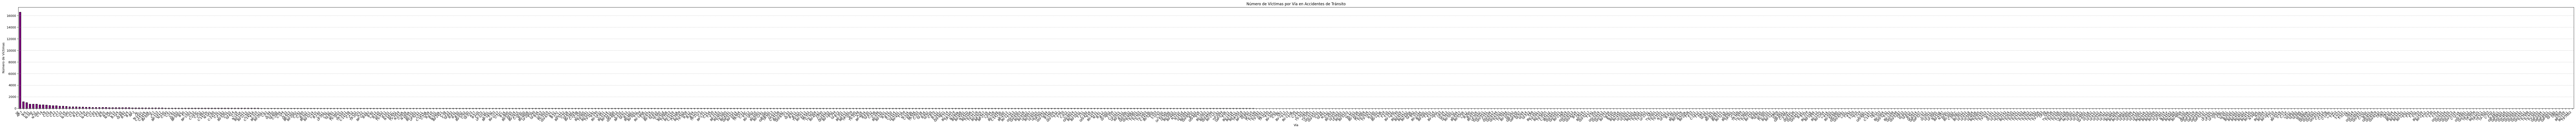

In [9]:
plt.figure(figsize=(150, 6))
df_grouped.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel('Vía')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por Vía en Accidentes de Tránsito')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
df_grouped = df.groupby('nomCom')['F_VICTIMES'].sum().sort_values(ascending=False)

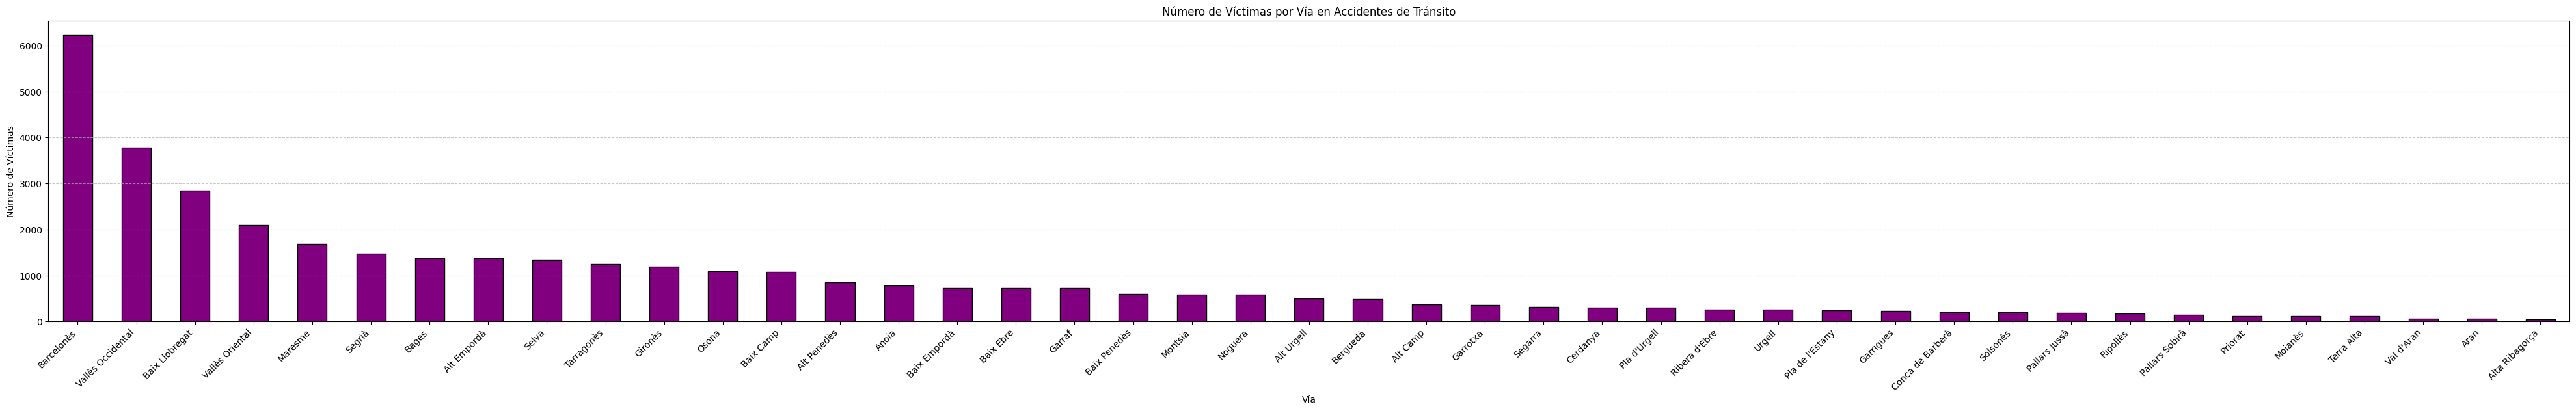

In [11]:
plt.figure(figsize=(50, 6))
df_grouped.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel('Vía')
plt.ylabel('Número de Víctimas')
plt.title('Número de Víctimas por Vía en Accidentes de Tránsito')
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()